<a href="https://colab.research.google.com/github/seymaazehra/DataMening/blob/main/GaussianMixtureModels(k%C3%BCmeleme)_daire_i%C3%A7ine_alma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns; sns.set() #renk ve hacim için
import numpy as np
from sklearn.datasets import make_blobs
!pip3 install -U scikit-learn


In [33]:
#generate some data
#from sklearn.datasets.samples_generator import make_blobs
from sklearn.datasets import make_blobs
X, y_true =make_blobs(n_samples=400,centers=4,
cluster_std=0.60, random_state=0)
X=X[:, ::-1]

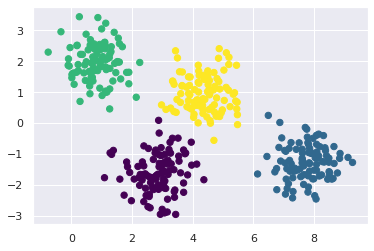

In [34]:
from sklearn.cluster import KMeans
kmeans=KMeans(4,random_state=0)
labels=kmeans.fit(X).predict(X)
plt.scatter(X[:, 0], X[:, -1], c=labels, s=40, cmap='viridis');

In [37]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [46]:
def plot_kmeans(kmeans ,X, n_clusters=4, rseed=0, ax=None):
  labels = kmeans.fit_predict(X)

  #plot the input data
  ax=ax or plt.gca()
  ax.axis('equal')
  ax.scatter(X[: ,0], X[: ,1], c=labels, s=40, cmap='viridis', zorder=2)

  #plot the reprasentation of the KMeans model
  centers=kmeans.cluster_centers_
  radii = [cdist(X[labels == i], [center]).max()
          for i,center in enumerate(centers)]
  for c, r in zip(centers, radii):
          ax.add_patch(plt.Circle(c,r,fc='#CCCCCC', lw=3, alpha=0.5, zorder=1 )) #CCCCCC çapa göre yuvarlak çizer



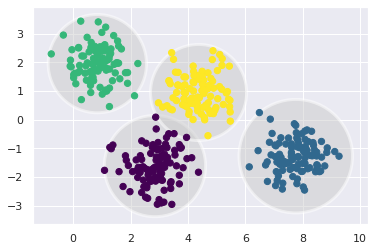

In [47]:
kmeans  = KMeans(n_clusters=4, random_state=0)
plot_kmeans(kmeans,X)

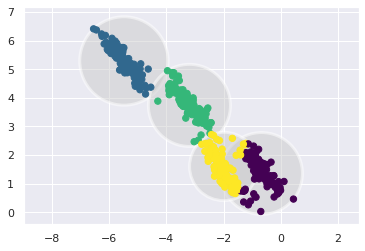

In [50]:
#yeni bir veri seti, birbirine yakın ve karmaşık ise ne olur?
rng=np.random.RandomState(13)
X_stretched = np.dot(X, rng.randn(2,2))

kmeans = KMeans(n_clusters=4, random_state=0)
plot_kmeans(kmeans, X_stretched)



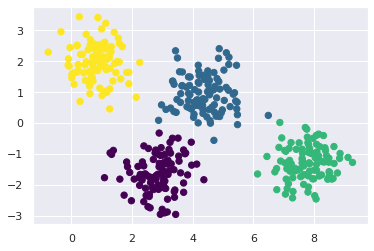

In [55]:
#*
from sklearn import mixture
gmm=mixture.GaussianMixture(n_components=4).fit(X)
labels=gmm.predict(X)
plt.scatter(X[:,0],X[:,1],c=labels,s=40, cmap='viridis');

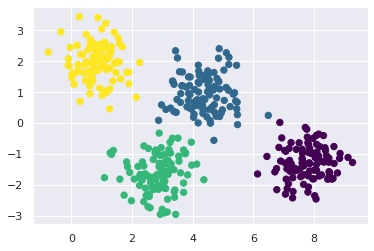

In [56]:
#* aynı
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=4).fit(X)
labels = gmm.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis');

In [58]:
#matris olarak cıktı alır ,tahminen birkaç veri yazdırdık
probs = gmm.predict_proba(X)
print(probs[:5].round(3))

[[0.463 0.537 0.    0.   ]
 [0.    0.    1.    0.   ]
 [0.    0.    1.    0.   ]
 [0.    1.    0.    0.   ]
 [0.    0.    1.    0.   ]]
